<a href="https://colab.research.google.com/github/SoheilKoohi/machine-learning-trainings/blob/master/house_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from keras import backend as K
from keras.datasets import cifar10
from keras.models import Model
from keras.layers import Dense, Conv2D, Flatten, Input, Dropout, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam

In [0]:
(X_train,Y_train),(X_test,Y_test) = cifar10.load_data()

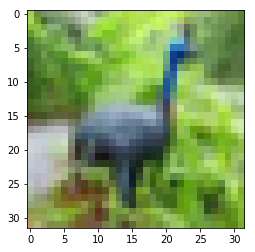

In [11]:
X_train.shape
plt.imshow(X_train[6])

In [0]:
def street_cnn(filters=(8,16, 32, 64,128), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering
  chanDim = -1
 
  # define the model input
  inputs = Input()
 
	# loop over the number of filters
  for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
    if i == 0:
      x = inputs
 
		# CONV => RELU => BN => POOL
    x = Conv2D(f, (3, 3), padding="same",name="street_conv"+str(i+1))(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2),name="street_pool" + str(i+1))(x)
    
  x = Flatten()(x)
  x = Dense(16,name="street_fully1")(x)
  x = Activation("relu")(x)
  x = BatchNormalization(axis=chanDim)(x)
  x = Dropout(0.5)(x)
 
    # apply another FC layer, this one to match the number of nodes
    # coming out of the MLP
  x = Dense(4,name="street_fully2")(x)
  x = Activation("relu")(x)

	# check to see if the regression node should be added
  if regress:
    x = Dense(1, activation="linear")(x)
 
	# construct the CNN
  model = Model(inputs, x)
 
	# return the CNN
  return model
    
    
    
def aerial_cnn(filters=(8,16, 32, 64,128), regress=False):
	# initialize the input shape and channel dimension, assuming
	# TensorFlow/channels-last ordering

  chanDim = -1
 
  # define the model input
  inputs = Input()
 
	# loop over the number of filters
  for (i, f) in enumerate(filters):
		# if this is the first CONV layer then set the input
		# appropriately
    if i == 0:
      x = inputs
 
		# CONV => RELU => BN => POOL
    x = Conv2D(f, (3, 3), padding="same",name="aerial_conv"+str(i+1))(x)
    x = Activation("relu")(x)
    x = BatchNormalization(axis=chanDim)(x)
    x = MaxPooling2D(pool_size=(2, 2),name="aerial_pool" + str(i+1))(x)
    
    
    
  x = Flatten()(x)
  x = Dense(16,name="aerial_fully1")(x)
  x = Activation("relu")(x)
  x = BatchNormalization(axis=chanDim)(x)
  x = Dropout(0.5)(x)
 
	# apply another FC layer, this one to match the number of nodes
	# coming out of the MLP
  x = Dense(4,name="aerial_fully2")(x)
  x = Activation("relu")(x)
 
	# check to see if the regression node should be added
  if regress:
    x = Dense(1, activation="linear")(x)
 
	# construct the CNN
  model = Model(inputs, x)
 
	# return the CNN
  return model

def non_image_ann():
  inputs = Input()
  x = Dense(60,name = "non_image_layer1")(inputs)
  x = Activation("relu")(x)
  
  x = Dense(30,name = "non_image_layer1")(x)
  x = Activation("relu")(x)
  model = Model(inputs,x)
  return model

In [0]:
def concat_model(First_model,Second_model,Third_model):
  first_model = First_model()
  second_model = Second_model()
  third_model = Third_model()
  combined_input = [first_model.output,second_model.output,third_model.output]
  x = Dense(60,activation="relu",name="mix_layer1")(combined_input)
  x = Dense(30,activation="relu",name="mix_layer2")(x)
  x = Dense(1,activation="linear",name="mix_layer3")(x)
  model = Model(inputs=[first_model.input,second_model.input,third_model.input],outputs=x)
  return model

In [0]:
model = concat_model(street_cnn,aerial_cnn,non_image_ann)
opt = Adam(lr = 1e-3)
model.compile(loss= "mean_square_error",opt)
model.fit([street_train,aerial_train,non_image_train],Y_train,
          validation_data= ([street_test,aerial_test,non_image_test],Y_test),epochs=200,batch_size=8)